<a href="https://colab.research.google.com/github/itimes-digital/olist_analise/blob/main/olist_analise_de_negocio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
ds_clientes = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/olist_customers_dataset.csv?raw=true');
ds_pedido_itens = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/olist_order_items_dataset.csv?raw=true');
ds_pedido_pagamentos = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/olist_order_payments_dataset.csv?raw=true');
ds_reviews = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/olist_order_reviews_dataset.csv?raw=true');
ds_pedidos = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/olist_orders_dataset.csv?raw=true');
ds_produtos = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/olist_products_dataset.csv?raw=true');
ds_vendedores = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/olist_sellers_dataset.csv?raw=true');
ds_categorias = pd.read_csv('https://github.com/itimes-digital/olist_analise/blob/main/dataset/product_category_name_translation.csv?raw=true');

In [4]:
ds_clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
ds_clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
ds_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
ds_clientes.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

## Percentual de Clientes e Recorrência de Compras

In [180]:
total_clientes = ds_clientes['customer_id'].nunique()
total_clientes_unico = ds_clientes['customer_unique_id'].nunique()

percentual = round((total_clientes_unico / total_clientes) * 100, 2)

diferenca = total_clientes - total_clientes_unico

print('Dos {0} registros de compradores, temos {1}% de compradores com apenas um registro de compra.'.format(total_clientes, percentual))
print('\nEnquanto isso, temos apenas {0} clientes que voltaram a comprar na loja.'.format(diferenca))
print('\nPortanto, {0}% de recorrência.'.format(round((100 - percentual), 2)))
print('\nEm um primeiro momento, podemos concluir que o LTV - Lifetime Value - desta amostra está baixo.')

Dos 99441 registros de compradores, temos 96.64% de compradores com apenas um registro de compra.

Enquanto isso, temos apenas 3345 clientes que voltaram a comprar na loja.

Portanto, 3.36% de recorrência.

Em um primeiro momento, podemos concluir que o LTV - Lifetime Value - desta amostra está baixo.


In [183]:
ds_clientes.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [184]:
ds_novo_clientes_cluster = ds_clientes[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']]
ds_novo_clientes_cluster.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


## Distribuição de Clientes pelo Brasil

A maior concentração de clientes encontra-se na região sudeste e sul, ultrapassando a marca de +70 mil clientes.

Porém, o consumo está mais atrelado as capitais, sendo a cidade de São Paulo com 15.540 compradores em um universo de 99.441 clientes.

In [ ]:
ds_novo_clientes_cluster['customer_state'].describe()

count     99441
unique       27
top          SP
freq      41746
Name: customer_state, dtype: object

In [ ]:
ds_novo_clientes_cluster['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

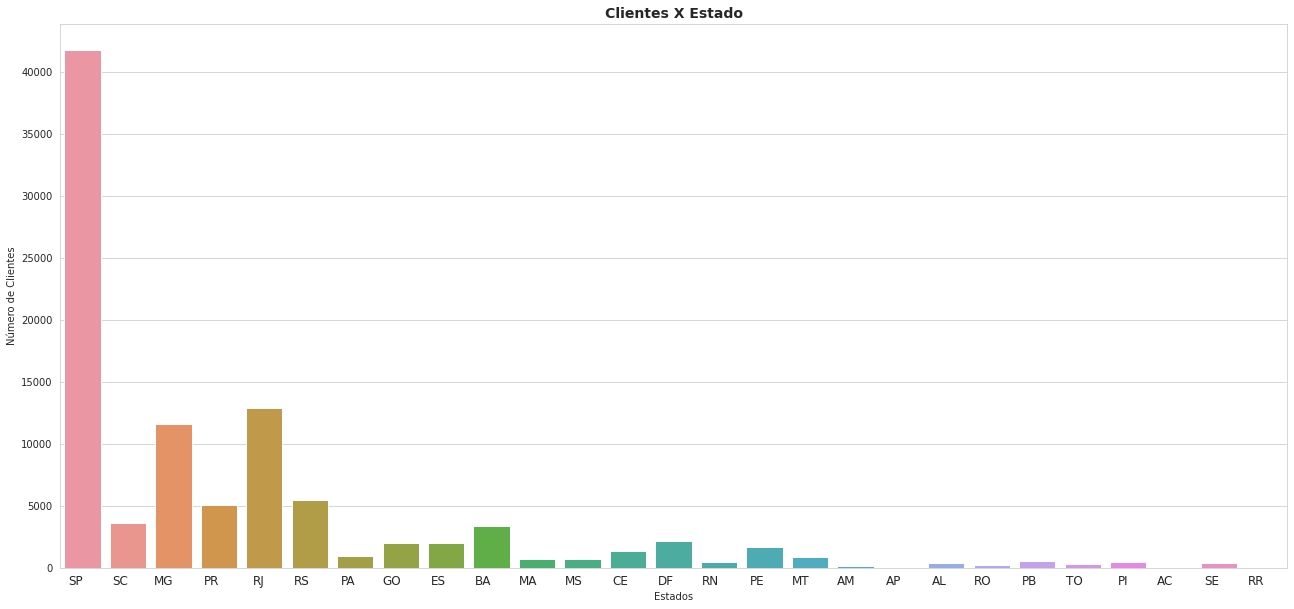

In [189]:
ds_novo_clientes_cluster = ds_novo_clientes_cluster.drop_duplicates()
estados = ds_novo_clientes_cluster['customer_state'].unique()
plt.figure(figsize=(22,10))

ax = sns.countplot(x = 'customer_state',  
                   data = ds_novo_clientes_cluster, 
                   order = estados)

ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation = 0, 
                   ha = 'right', 
                   fontsize = 12)

plt.title('Clientes X Estado', fontsize = 14, fontweight = 'bold')
plt.xlabel('Estados') 
plt.ylabel('Número de Clientes')
plt.show()

In [190]:
ds_novo_clientes_cluster['customer_city'].describe()

count         99441
unique         4119
top       sao paulo
freq          15540
Name: customer_city, dtype: object

In [192]:
ds_novo_clientes_cluster['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [193]:
ds_pedido_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
ds_pedido_itens.shape

(112650, 7)

In [ ]:
ds_pedido_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
ds_pedido_itens.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
ds_pedido_itens.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [14]:
ds_pedido_itens['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [17]:
ds_pedido_itens['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [15]:
ds_pedido_itens.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [146]:
ds_pedido_itens_grupo = ds_pedido_itens.groupby("order_id").agg({"product_id": "count"})
ds_pedido_itens_grupo.reset_index()

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [148]:
ds_pedido_itens_grupo.query("order_id == '8272b63d03f5f79c56e9e4120aec44ef'")

,product_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21


In [149]:
ds_pedido_itens.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [150]:
ds_pedido_itens_grupo_frete = ds_pedido_itens
ds_pedido_itens_grupo_frete = ds_pedido_itens_grupo_frete[['order_id', 
                                                           'product_id', 
                                                           'seller_id', 
                                                           'shipping_limit_date', 
                                                           'price', 
                                                           'freight_value']]
ds_pedido_itens_grupo_frete = ds_pedido_itens_grupo_frete.drop_duplicates()
ds_pedido_itens_grupo_frete.head()

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [151]:
ds_pedido_itens_grupo_frete = ds_pedido_itens_grupo_frete.groupby("order_id").agg({"freight_value": "sum"})
ds_pedido_itens_grupo_frete.reset_index()

,order_id,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,13.29
1,00018f77f2f0320c557190d7a144bdd3,19.93
2,000229ec398224ef6ca0657da4fc703e,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,36.53
98663,fffce4705a9662cd70adb13d4a31832d,16.95
98664,fffe18544ffabc95dfada21779c9644f,8.72


In [194]:
ds_pedido_itens_grupo_frete.query("order_id == '8272b63d03f5f79c56e9e4120aec44ef'")

,freight_value
order_id,
8272b63d03f5f79c56e9e4120aec44ef,22.35


In [195]:
ds_pedidos_itens_preco_somados = ds_pedido_itens.groupby("order_id")["price"].sum()
ds_pedidos_itens_preco_somados

order_id
00010242fe8c5a6d1ba2dd792cb16214     58.90
00018f77f2f0320c557190d7a144bdd3    239.90
000229ec398224ef6ca0657da4fc703e    199.00
00024acbcdf0a6daa1e931b038114c75     12.99
00042b26cf59d7ce69dfabb4e55b4fd9    199.90
                                     ...  
fffc94f6ce00a00581880bf54a75a037    299.99
fffcd46ef2263f404302a634eb57f7eb    350.00
fffce4705a9662cd70adb13d4a31832d     99.90
fffe18544ffabc95dfada21779c9644f     55.99
fffe41c64501cc87c801fd61db3f6244     43.00
Name: price, Length: 98666, dtype: float64

In [154]:
ds_pedidos_itens_preco_somados = pd.DataFrame(ds_pedidos_itens_preco_somados, columns=['price'])
ds_pedidos_itens_preco_somados

,price
order_id,
00010242fe8c5a6d1ba2dd792cb16214,58.90
00018f77f2f0320c557190d7a144bdd3,239.90
000229ec398224ef6ca0657da4fc703e,199.00
00024acbcdf0a6daa1e931b038114c75,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...
fffc94f6ce00a00581880bf54a75a037,299.99
fffcd46ef2263f404302a634eb57f7eb,350.00
fffce4705a9662cd70adb13d4a31832d,99.90


In [155]:
ds_pedidos_itens_preco_somados.query("order_id == '8272b63d03f5f79c56e9e4120aec44ef'")

,price
order_id,
8272b63d03f5f79c56e9e4120aec44ef,31.8


In [156]:
ds_pedidos_itens_unicos = ds_pedidos_itens_preco_somados.join(ds_pedido_itens_grupo, on="order_id").join(ds_pedido_itens_grupo_frete, on="order_id")
ds_pedidos_itens_unicos.head()

,price,product_id,freight_value
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,1,13.29
00018f77f2f0320c557190d7a144bdd3,239.90,1,19.93
000229ec398224ef6ca0657da4fc703e,199.00,1,17.87
00024acbcdf0a6daa1e931b038114c75,12.99,1,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,1,18.14


In [167]:
ds_pedidos_itens_unicos = ds_pedidos_itens_unicos.rename(columns={"product_id": "qt_item"})

In [196]:
ds_pedidos_itens_unicos.query("order_id == '8272b63d03f5f79c56e9e4120aec44ef'")

,price,qt_item,freight_value
order_id,,,
8272b63d03f5f79c56e9e4120aec44ef,31.8,21,22.35


In [197]:
ds_pedidos_itens_unicos.shape

(98666, 3)

In [169]:
ds_pedidos_itens_unicos.describe()

,price,qt_item,freight_value
count,98666.000000,98666.000000,98666.000000
mean,137.754076,1.141731,20.877352
std,210.645145,0.538452,16.967415
min,0.850000,1.000000,0.000000
25%,45.900000,1.000000,13.470000
50%,86.900000,1.000000,16.660000
75%,149.900000,1.000000,22.140000
max,13440.000000,21.000000,1002.290000


In [204]:
pedido_unico_produto = ds_pedidos_itens_unicos.query('qt_item == 1')['qt_item'].count()
tota_pedidos = ds_pedidos_itens_unicos['qt_item'].count()

In [212]:
percentual_pedido = (pedido_unico_produto / tota_pedidos) * 100;
percentual_pedido_cliente = (total_clientes_unico / pedido_unico_produto) ;
#print('{0} clientes fazem compras de apenas um único produto por pedido.'.format(total_clientes_unico))
print('% de pedidos com apenas um único produto: {0}%'.format(round(diferenca, 2)))
print('Proporção de pedidos com apenas um único produto por cliente: {0}'.format(round(percentual_pedido_cliente, 2)))

% de pedidos com apenas um único produto: 90.06%
Proporção de pedidos com apenas um único produto por cliente: 1.08


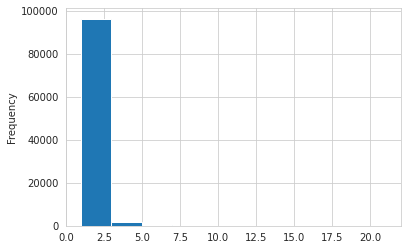

In [163]:
sns.set_style("whitegrid")
ds_pedidos_itens_unicos["product_id"].plot(kind='hist')

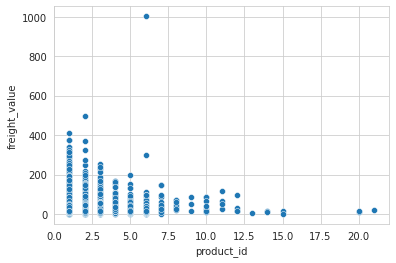

In [165]:

budget_gross = ds_pedidos_itens_unicos[["product_id", "freight_value"]]

sns.scatterplot(x="product_id", y="freight_value", data = budget_gross)

In [213]:
ds_pedido_frete_pago = ds_pedidos_itens_unicos.query('freight_value != 0.0')
ds_pedido_frete_pago.head()

,price,qt_item,freight_value
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,1,13.29
00018f77f2f0320c557190d7a144bdd3,239.90,1,19.93
000229ec398224ef6ca0657da4fc703e,199.00,1,17.87
00024acbcdf0a6daa1e931b038114c75,12.99,1,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,1,18.14


In [214]:
ds_pedido_frete_pago.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98328 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          98328 non-null  float64
 1   qt_item        98328 non-null  int64  
 2   freight_value  98328 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.0+ MB


In [215]:
ds_pedido_frete_pago.describe()

,price,qt_item,freight_value
count,98328.000000,98328.000000,98328.000000
mean,137.844178,1.141770,20.949117
std,210.973502,0.538789,16.952267
min,0.850000,1.000000,1.200000
25%,45.900000,1.000000,13.500000
50%,86.500000,1.000000,16.690000
75%,149.900000,1.000000,22.170000
max,13440.000000,21.000000,1002.290000


In [216]:
ds_pedido_frete_gratis = ds_pedidos_itens_unicos.query('freight_value == 0.0')
ds_pedido_frete_gratis.head()

,price,qt_item,freight_value
order_id,,,
00404fa7a687c8c44ca69d42695aae73,99.9,1,0.0
00a870c6c06346e85335524935c600c0,69.9,1,0.0
011c899816ea29773525bd3322dbb6aa,99.9,1,0.0
012b3f6ab7776a8ab3443a4ad7bef2e6,107.8,2,0.0
04105b54650921ca3246f52e6f175f46,69.9,1,0.0


In [217]:
ds_pedido_frete_gratis.describe()

,price,qt_item,freight_value
count,338.000000,338.000000,338.0
mean,111.542515,1.130178,0.0
std,58.467110,0.429865,0.0
min,53.900000,1.000000,0.0
25%,69.900000,1.000000,0.0
50%,99.900000,1.000000,0.0
75%,112.900000,1.000000,0.0
max,712.900000,5.000000,0.0


In [218]:
ds_pedido_frete_gratis.nunique()

price            27
qt_item           5
freight_value     1
dtype: int64

##Correlações básicas

Para o conjunto de dados em análise de frete grátis, a quantidade de item tem correlação média com o preço. Isto é, por haver frete grátis, há proporcionalmente mais itens no pedido.

In [230]:
ds_pedido_frete_gratis[['price', 'qt_item']].corr()

,price,qt_item
price,1.000000,0.416931
qt_item,0.416931,1.000000


Já para o conjunto de dados com frete pago, a quantidade de itens tem correlação baixa com o valor do pedido, isto é, o preço do frete pode estar influenciando no valor médio dos pedidos.

A quantidade de itens de pedidos para frete grátis e pago, diferencia em 0,11 desvio padrão. Isto é, há pouco impacto.

In [229]:
ds_pedido_frete_pago[['price', 'qt_item', 'freight_value']].corr()

,price,qt_item,freight_value
price,1.000000,0.152929,0.399006
qt_item,0.152929,1.000000,0.085633
freight_value,0.399006,0.085633,1.000000


In [ ]:
ds_pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
ds_pedidos.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
ds_pedidos['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [234]:
ds_pedidos_itens_unicos = ds_pedidos.join(ds_pedidos_itens_unicos, on="order_id")
ds_pedidos_itens_unicos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,qt_item,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99,1.0,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70,1.0,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90,1.0,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00,1.0,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90,1.0,8.72


In [237]:
ds_pedidos_itens_unicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   price                          98666 non-null  float64
 9   qt_item                        98666 non-null  float64
 10  freight_value                  98666 non-null  float64
dtypes: float64(3), object(8)
memory usage: 8.3+ MB


In [238]:
ds_pedidos_itens_unicos.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
price                             775
qt_item                           775
freight_value                     775
dtype: int64

In [ ]:
ds_pedido_pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
ds_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
ds_vendedores.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
ds_categorias.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [49]:
ds_produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
ds_produtos.query("product_id == '270516a3f41dc035aa87d220228f844c'")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0
